## Installations and Imports

In [ ]:
pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.5 MB/s eta 0:00:00


In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 13.9 MB/s eta 0:00:00


In [ ]:
#importing libraries
import numpy as np
from numpy import array
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score 
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import log_loss

import lightgbm as lgbm
from lightgbm import LGBMClassifier
from lightgbm.callback import early_stopping
from catboost import CatBoostClassifier

import keras 
from keras.layers import *
from keras.optimizers import *
from keras.models import Model
from keras import backend as K

import optuna
from optuna.integration import LightGBMPruningCallback
from optuna.samplers import TPESampler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading csv files
X_train=pd.read_csv('/content/drive/My Drive/Data/ML_567_Project_Data/train_values.csv')
y_train=pd.read_csv('/content/drive/My Drive/Data/ML_567_Project_Data/train_labels.csv')
X_test=pd.read_csv('/content/drive/My Drive/Data/ML_567_Project_Data/test_values.csv')

In [ ]:
#dropping building ID column
X_train.drop(['building_id'], axis=1, inplace=True)
y_train.drop(['building_id'], axis=1, inplace=True)
X_test.drop(['building_id'], axis=1, inplace=True)

## Exploratory Data Analysis

In [ ]:
#data description
X_train.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,...,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,...,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<ipython-input-8-f6a568b220af>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X_train.corr())


<Axes: >

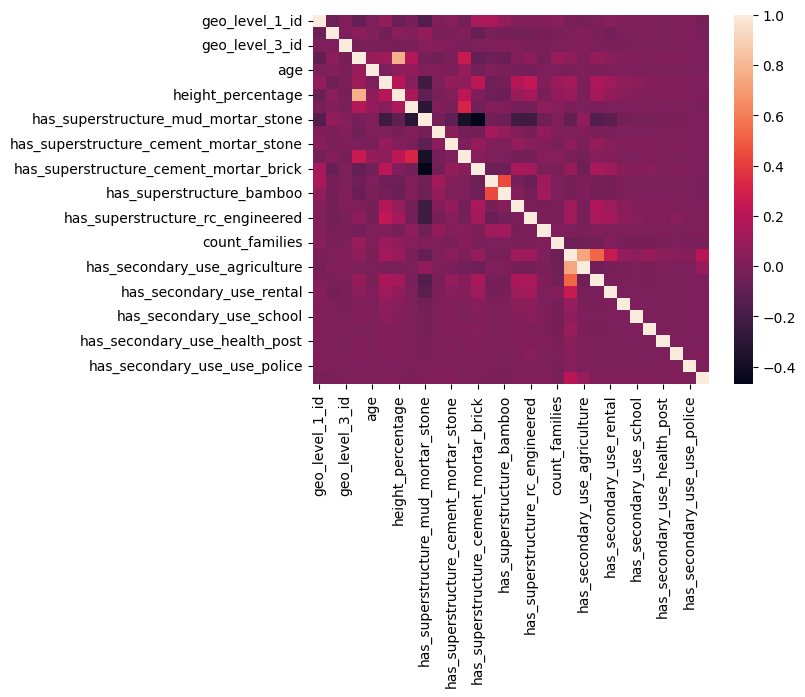

In [ ]:
#correlation heatmap
sns.heatmap(X_train.corr())

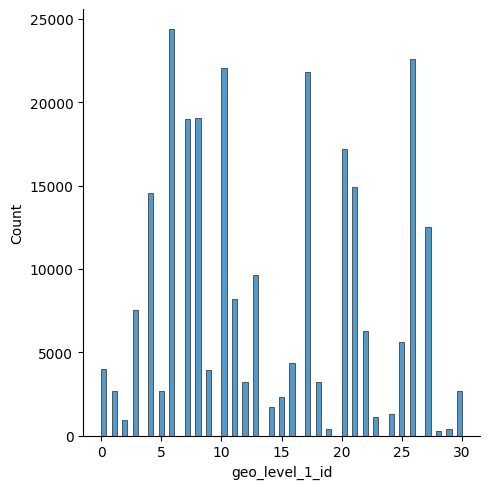

In [ ]:
#distribution of geo level 1
sns.displot(X_train, x="geo_level_1_id")

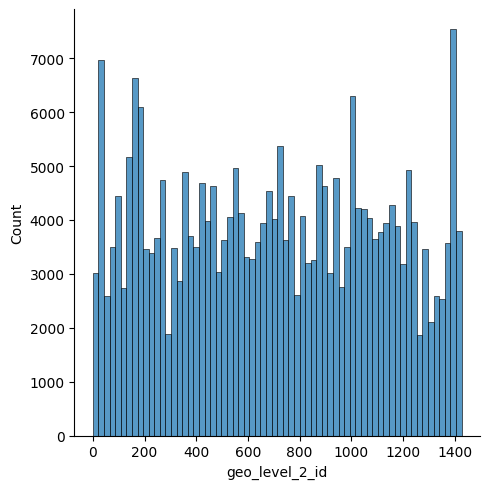

In [ ]:
#distribution of geo level 2
sns.displot(X_train, x="geo_level_2_id")

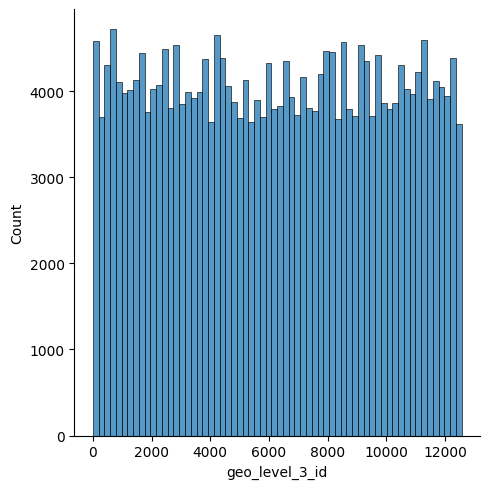

In [ ]:
#distribution of geo level 3
sns.displot(X_train, x="geo_level_3_id")

<Axes: xlabel='damage_grade', ylabel='count'>

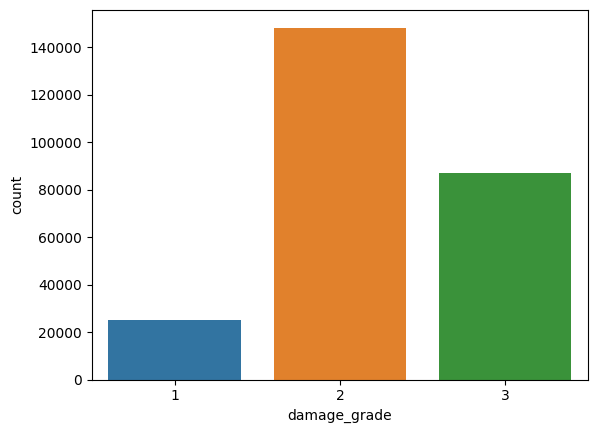

In [ ]:
#distribution of damage grade
sns.countplot(x="damage_grade", data=y_train)

## Preprocessing

### Encoding geographic features using autoencoder model

In [ ]:
#creating dataframe based on the geographical location
geo1 = np.array(pd.get_dummies(pd.concat([X_train["geo_level_1_id"], X_test["geo_level_1_id"]])))
geo2 = np.array(pd.get_dummies(pd.concat([X_train["geo_level_2_id"], X_test["geo_level_2_id"]])))
geo3 = np.array(pd.get_dummies(pd.concat([X_train["geo_level_3_id"], X_test["geo_level_3_id"]])))

In [ ]:
def Encoder():
    input_layer = Input((geo3.shape[1],))
    inter_layer = Dense(16, name="intermediate")(input_layer)
    x2 = Dense(geo2.shape[1], activation='sigmoid')(inter_layer)
    x1 = Dense(geo1.shape[1], activation='sigmoid')(inter_layer)

    model = Model(input_layer, [x2,x1])
    model.compile(loss="binary_crossentropy", optimizer="adam")
    return model

auto_model = Encoder()
auto_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 11861)]      0           []                               
                                                                                                  
 intermediate (Dense)           (None, 16)           189792      ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 1418)         24106       ['intermediate[0][0]']           
                                                                                                  
 dense_1 (Dense)                (None, 31)           527         ['intermediate[0][0]']           
                                                                                              

In [ ]:
#generate weights
model = Encoder()
model.fit(geo3, [geo2, geo1], batch_size=128, epochs=10, verbose=2)
model.save("geo_embed.h5")

Epoch 1/10
2715/2715 - 15s - loss: 0.2060 - dense_2_loss: 0.0531 - dense_3_loss: 0.1529 - 15s/epoch - 5ms/step
Epoch 2/10
2715/2715 - 11s - loss: 0.0538 - dense_2_loss: 0.0052 - dense_3_loss: 0.0486 - 11s/epoch - 4ms/step
Epoch 3/10
2715/2715 - 12s - loss: 0.0149 - dense_2_loss: 0.0041 - dense_3_loss: 0.0107 - 12s/epoch - 4ms/step
Epoch 4/10
2715/2715 - 10s - loss: 0.0068 - dense_2_loss: 0.0035 - dense_3_loss: 0.0033 - 10s/epoch - 4ms/step
Epoch 5/10
2715/2715 - 9s - loss: 0.0043 - dense_2_loss: 0.0030 - dense_3_loss: 0.0013 - 9s/epoch - 3ms/step
Epoch 6/10
2715/2715 - 9s - loss: 0.0030 - dense_2_loss: 0.0024 - dense_3_loss: 6.1885e-04 - 9s/epoch - 3ms/step
Epoch 7/10
2715/2715 - 9s - loss: 0.0020 - dense_2_loss: 0.0017 - dense_3_loss: 3.2292e-04 - 9s/epoch - 3ms/step
Epoch 8/10
2715/2715 - 9s - loss: 0.0013 - dense_2_loss: 0.0011 - dense_3_loss: 1.7505e-04 - 9s/epoch - 3ms/step
Epoch 9/10
2715/2715 - 9s - loss: 8.4937e-04 - dense_2_loss: 7.5477e-04 - dense_3_loss: 9.4592e-05 - 9s/epoc

In [ ]:
#Load model with saved weights
model = Encoder()
model.load_weights("geo_embed.h5")

In [ ]:
inter_layer_output = K.function([model.layers[0].input], [model.layers[1].output])

[model.layers[0].input]

[<KerasTensor: shape=(None, 11861) dtype=float32 (created by layer 'input_3')>]

In [ ]:
#Extracting embeddings for training data

output = []
for data in geo3[:260601]:
    layer_output = inter_layer_output(np.array([data]))[0]
    output.append(layer_output)

output = np.array(output)
output = np.squeeze(output)

train_data = pd.get_dummies(X_train.copy()) #one-hot encoding of categorical variables
train_data = train_data.drop(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id'], axis=1)
train_data = train_data.assign(geo_feature1=output[:,0],
                               geo_feature2=output[:,1],
                               geo_feature3=output[:,2],  
                               geo_feature4=output[:,3],
                               geo_feature5=output[:,4],    
                               geo_feature6=output[:,5],
                               geo_feature7=output[:,6],
                               geo_feature8=output[:,7],
                               geo_feature9=output[:,8],
                               geo_feature10=output[:,9],
                               geo_feature11=output[:,10],
                               geo_feature12=output[:,11],
                               geo_feature13=output[:,12],
                               geo_feature14=output[:,13],
                               geo_feature15=output[:,14],           
                               geo_feature16=output[:,15])

In [ ]:
#Extracting embeddings for test data

output = []
for data in geo3[260601:]:
    layer_output = inter_layer_output(np.array([data]))[0]
    output.append(layer_output)

output = np.array(output)
output = np.squeeze(output)

test_data = pd.get_dummies(X_test.copy()) #one-hot encoding of categorical variables
test_data = test_data.drop(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id'], axis=1)
test_data = test_data.assign(geo_feature1=output[:,0],
                            geo_feature2=output[:,1],
                            geo_feature3=output[:,2],  
                            geo_feature4=output[:,3],
                            geo_feature5=output[:,4],    
                            geo_feature6=output[:,5],
                            geo_feature7=output[:,6],
                            geo_feature8=output[:,7],
                            geo_feature9=output[:,8],
                            geo_feature10=output[:,9],
                            geo_feature11=output[:,10],
                            geo_feature12=output[:,11],
                            geo_feature13=output[:,12],
                            geo_feature14=output[:,13],
                            geo_feature15=output[:,14],           
                            geo_feature16=output[:,15])

In [ ]:
X_train = train_data
X_test = test_data

### Feature scaling

In [ ]:
#using Min-Max scaler for numeric features
scaler = MinMaxScaler()
X_train[['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'count_families']] = scaler.fit_transform(X_train[['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'count_families']])
X_test[['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'count_families']] = scaler.fit_transform(X_test[['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'count_families']])


### Feature selection using Recursive Feature Elimination (RFE)

In [ ]:
#using Random Forest Classifier for RFE
rfc = RandomForestClassifier()
select = RFECV(estimator=rfc, cv=3)
select = select.fit(X_train,y_train)
print("Feature ranking: ", select.ranking_)

In [ ]:
#getting selected features
mask = select.get_support()

In [ ]:
#dropping low importance features
X_train=X_train.drop(['has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police'], axis=1)
X_test=X_test.drop(['has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police'], axis=1)

In [ ]:
#assigning variables for classification
X=X_train
y=y_train["damage_grade"]-1

## Classification

### Catboost Classifier

In [ ]:
cat_model = CatBoostClassifier(loss_function='MultiClass', eval_metric='TotalF1', verbose=True)

#hyperparameter grid
random_grid = {'depth':[4,5,6,7,8,9,10],
          'iterations':[500,1000,2000,3000],
          'learning_rate':[0.001,0.01,0.05,0.1,0.2], 
          'l2_leaf_reg':[1,3,5,10,20],
          'border_count':[5,10,20,50,100,200] }
               
# Randomized search using 5 fold cross validation

cat_random = RandomizedSearchCV(estimator = cat_model, param_distributions = random_grid, cv = 5, verbose=2)
cat_random.fit(X_train, y_train)

In [ ]:
#finding the best estimator
cat_random.best_estimator_

In [ ]:
#finding the best parameters
cat_random.best_params_

In [ ]:
#training on the best estimator
cat_model = cat_random.best_estimator_.fit(X_train, y_train)

### LightGBM Classifier

In [ ]:
#defining objective function for Optuna

def objective(trial):    
    param_grid = {
        "objective": "multiclass",
        "metric": "multi_error",
        "verbosity": 1,
        "boosting_type": "gbdt",
        "num_class": 3,
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.2),
        "max_depth": trial.suggest_int("max_depth", -1, 12),
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 2, 512),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.1, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 0, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 100),
        "seed": 42
    }

    #using 5 fold stratified cross validation
    cv = StratifiedKFold(n_splits=5, shuffle=True)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        train_data = lgbm.Dataset(X_train, label=y_train)
        val_data = lgbm.Dataset(X_test, label=y_test)

        model=lgbm.train(
            param_grid,
            train_data,
            1000,
            valid_sets=[val_data],
            early_stopping_rounds=100
        )
        preds = model.predict(X_test)

        #calculating f1 score on validation set
        cv_scores[idx] = f1_score(y_test, preds.argmax(axis=1), average="micro")

    return np.mean(cv_scores)

In [ ]:

#defining Optuna sampler and method
sampler = TPESampler(seed=42)
study = optuna.create_study(study_name="lightgbm", direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=20)

In [ ]:
#plot of optimization history
optuna.visualization.plot_optimization_history(study)

In [ ]:
#plot of objective values of parameters
optuna.visualization.plot_slice(study)

In [ ]:
#plot of hyperparameter importances
optuna.visualization.plot_param_importances(study)

In [ ]:
#finding best parameters
print('Best parameters:', study.best_params)

Best parameters: {'learning_rate': 0.15912798713994736, 'max_depth': 7, 'lambda_l1': 2.6185068507773707e-08, 'lambda_l2': 0.0029369981104377003, 'num_leaves': 89, 'feature_fraction': 0.1585464336867516, 'bagging_fraction': 0.9539969835279999, 'bagging_freq': 15, 'min_child_samples': 81}


In [ ]:
#training the model on optimal hyperparameters
train_data = lgbm.Dataset(X_train, label=y)

optimal_params = {
        "objective" : "multiclass",
        "num_class":3,
        "boosting": 'gbdt',
        "seed": 42,
        **study.best_params
    }

lgbm_model=lgbm.train(optimal_params,
                 train_data,
                 1000,
                 keep_training_booster=True)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

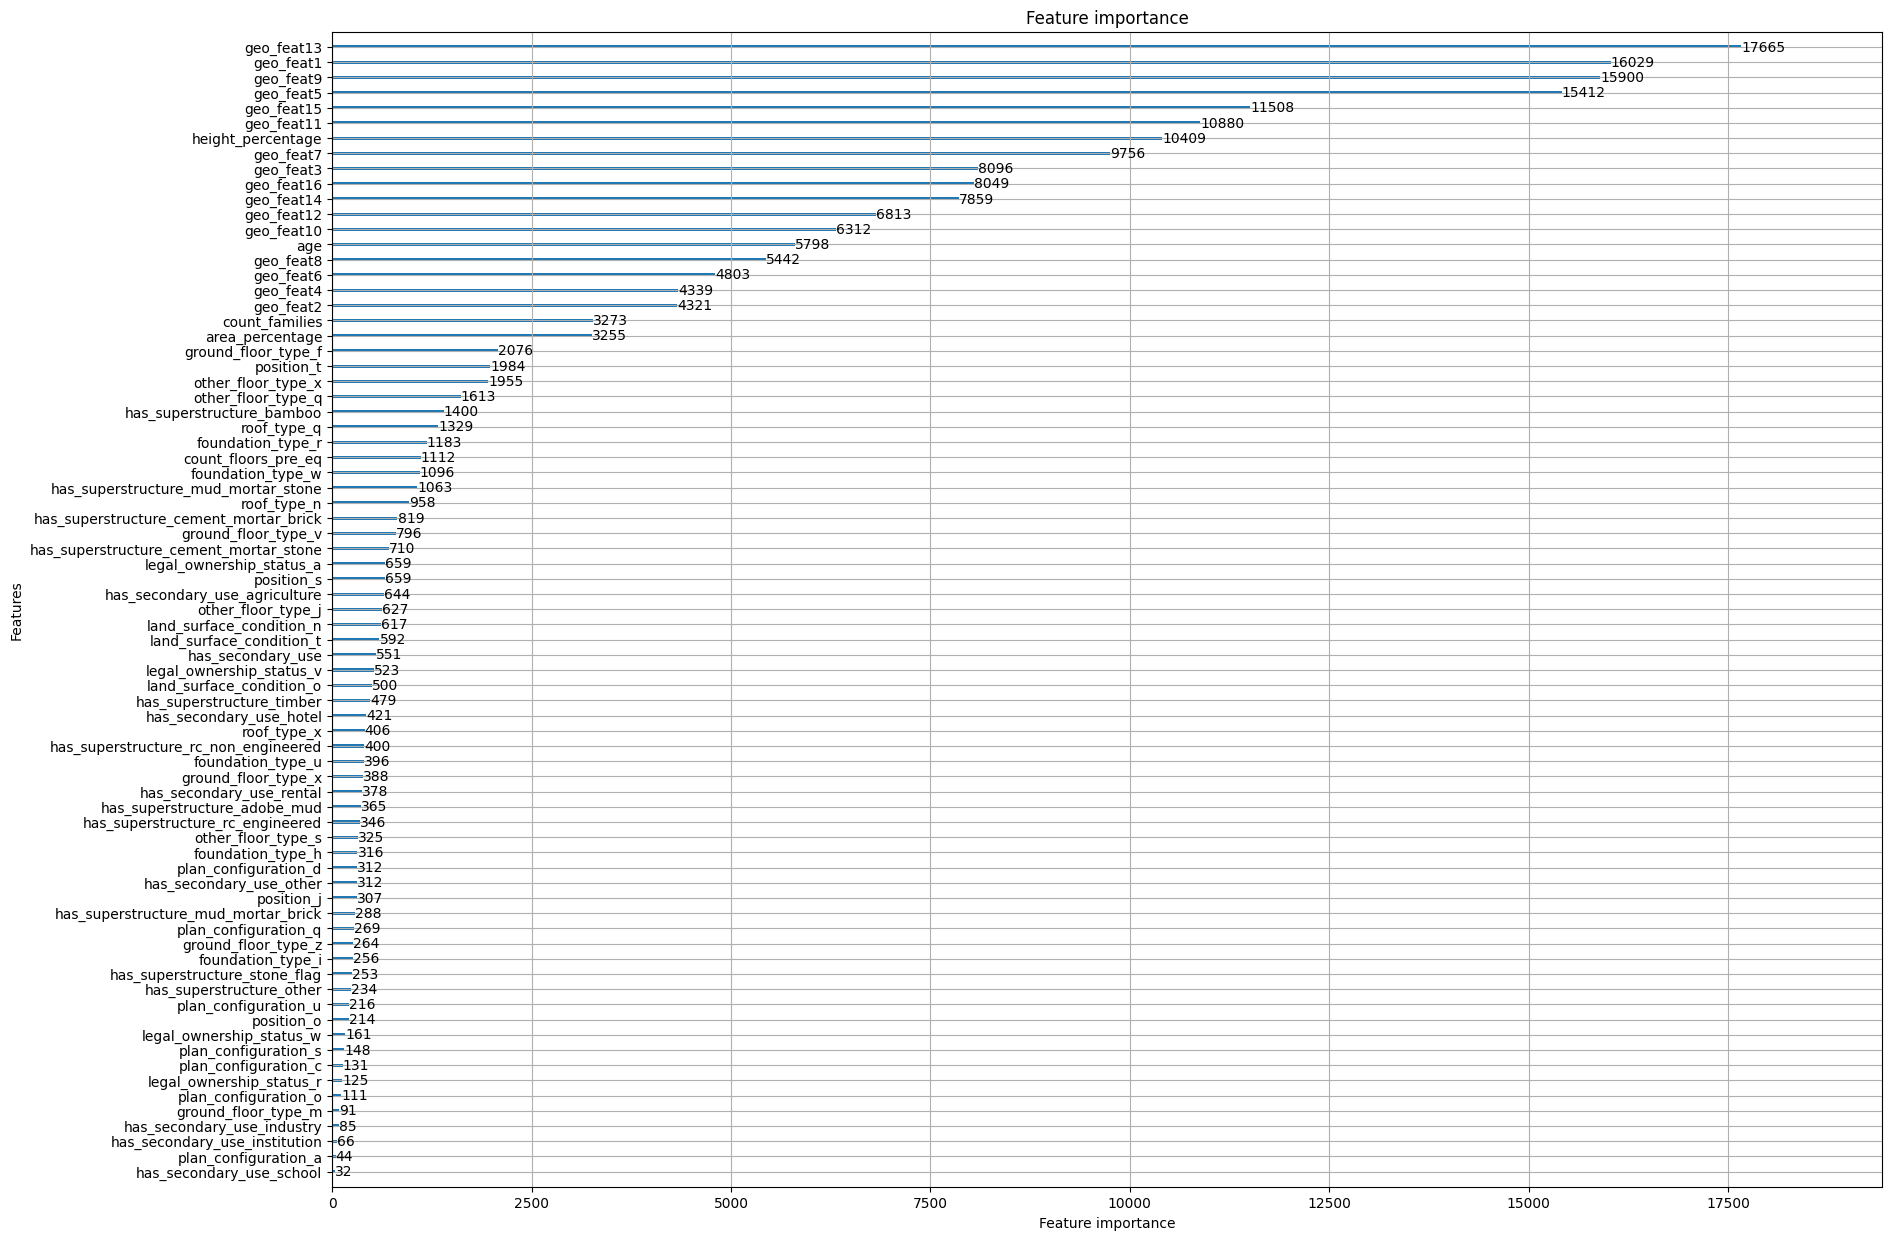

In [ ]:
#plot of feature importances from LightGBM
lgbm.plot_importance(lgbm_model,  figsize=(20, 15))

## Predicting on test set


In [ ]:
#testing catboost
y_pred = cat_model.predict(X_test)

In [ ]:
#testing lightgbm
y_pred = lgbm_model.predict(X_test)
y_pred=y_pred.argmax(axis=1)

## Submission file

In [ ]:
#creating dataframe for submission
submission=pd.read_csv('/content/drive/MyDrive/Data/ML_567_Project_Data/submission_format.csv')
submission["damage_grade"] = y_pred

In [ ]:
#converting damage grade to required format
submission['damage_grade']=submission['damage_grade']+1
submission.head()

In [ ]:
#converting to csv
submission.to_csv("submission.csv", index=False)

In [ ]:
#downloading csv file
from google.colab import files
files.download('submission.csv')